# RGB Colorspace

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline

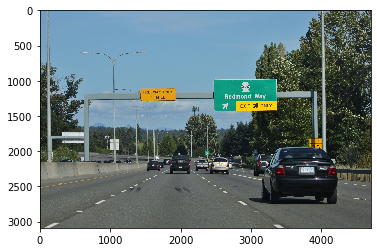

In [5]:
# Read in image

image = cv2.imread('images/wa_state_highway.jpg')

# BGR to RGB

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

Isolate the three channels

Text(0.5, 1.0, 'Blue Channel')

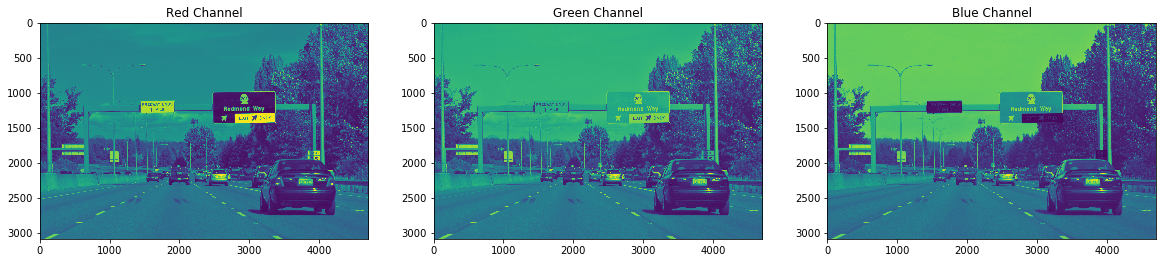

In [7]:
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.imshow(red)
ax1.set_title('Red Channel')

ax2.imshow(green)
ax2.set_title('Green Channel')

ax3.imshow(blue)
ax3.set_title('Blue Channel')